<a href="https://colab.research.google.com/github/MuneefMumthas/CO699-Muneef-22206529/blob/main/CO699_Muneef_22206529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the ipynb file for Muneef's Dissertation.

Project: Liver Tumor Segmentation using LiTS17 Dataset

Link for the kaggle sites:

part 1: https://www.kaggle.com/datasets/andrewmvd/liver-tumor-segmentation

part 2: https://www.kaggle.com/datasets/andrewmvd/liver-tumor-segmentation-part-2

I will be saving them in my drive to access them locally.

In [1]:
# Load the Drive helper and mount
from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Importing the libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
import torch

In [3]:
#Importing the dataset
file_list = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/LiTS17'):
    for filename in filenames:
        file_list.append((dirname, filename))

df = pd.DataFrame(file_list, columns =['dirname', 'filename'])
df.sort_values(by=['filename'], ascending=True)

,dirname,filename
2,/content/drive/MyDrive/LiTS17/segmentations,segmentation-0.nii
0,/content/drive/MyDrive/LiTS17/segmentations,segmentation-1.nii
1,/content/drive/MyDrive/LiTS17/segmentations,segmentation-10.nii
3,/content/drive/MyDrive/LiTS17/segmentations,segmentation-100.nii
4,/content/drive/MyDrive/LiTS17/segmentations,segmentation-101.nii
...,...,...
257,/content/drive/MyDrive/LiTS17/volume_pt6,volume-95.nii
258,/content/drive/MyDrive/LiTS17/volume_pt6,volume-96.nii
259,/content/drive/MyDrive/LiTS17/volume_pt6,volume-97.nii
260,/content/drive/MyDrive/LiTS17/volume_pt6,volume-98.nii


In [4]:
#Adding mask columns
df["mask_dirname"] = ""
df["mask_filename"] = ""

#Creating a loop to map CT scans to segmentation masks
for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"

    df.loc[df['filename'] == ct, 'mask_filename'] = mask
    df.loc[df['filename'] == ct, 'mask_dirname'] = "/content/drive/MyDrive/LiTS17/segmentations"

#Drop unwanted segmentation rows
df = df[df.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True)

df

,dirname,filename,mask_dirname,mask_filename
0,/content/drive/MyDrive/LiTS17/volume_pt1,volume-0.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-0.nii
1,/content/drive/MyDrive/LiTS17/volume_pt1,volume-1.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-1.nii
2,/content/drive/MyDrive/LiTS17/volume_pt1,volume-10.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-10.nii
3,/content/drive/MyDrive/LiTS17/volume_pt6,volume-100.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-100.nii
4,/content/drive/MyDrive/LiTS17/volume_pt8,volume-101.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-101.nii
...,...,...,...,...
126,/content/drive/MyDrive/LiTS17/volume_pt6,volume-95.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-95.nii
127,/content/drive/MyDrive/LiTS17/volume_pt6,volume-96.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-96.nii
128,/content/drive/MyDrive/LiTS17/volume_pt6,volume-97.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-97.nii
129,/content/drive/MyDrive/LiTS17/volume_pt6,volume-98.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-98.nii


In [5]:
#sorting the ct scans and segmentation to match the index
df['file_number'] = df['filename'].str.extract('(\d+)').astype(int)
df = df[df.mask_filename != ''].sort_values(by=['file_number']).reset_index(drop=True)

#dropping the file number column after sorting
df = df.drop(columns=['file_number'])

df

,dirname,filename,mask_dirname,mask_filename
0,/content/drive/MyDrive/LiTS17/volume_pt1,volume-0.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-0.nii
1,/content/drive/MyDrive/LiTS17/volume_pt1,volume-1.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-1.nii
2,/content/drive/MyDrive/LiTS17/volume_pt1,volume-2.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-2.nii
3,/content/drive/MyDrive/LiTS17/volume_pt1,volume-3.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-3.nii
4,/content/drive/MyDrive/LiTS17/volume_pt1,volume-4.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-4.nii
...,...,...,...,...
126,/content/drive/MyDrive/LiTS17/volume_pt8,volume-126.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-126.nii
127,/content/drive/MyDrive/LiTS17/volume_pt8,volume-127.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-127.nii
128,/content/drive/MyDrive/LiTS17/volume_pt8,volume-128.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-128.nii
129,/content/drive/MyDrive/LiTS17/volume_pt8,volume-129.nii,/content/drive/MyDrive/LiTS17/segmentations,segmentation-129.nii


Methods to load the nii files and display the scans and segmentations:

In [6]:
def display_image(file_path, title="Image"):

    #loading the nii image and converting to a numpy array
    nii_image = nib.load(file_path).get_fdata()

    #slicing the 3d image in half to see the mid part
    slice_idx = int(55 / 75 * nii_image.shape[2])

    plt.figure(figsize=(5, 5))
    plt.imshow(nii_image[:, :, slice_idx].T, cmap=plt.cm.bone)
    plt.title(title)
    plt.axis('off')
    plt.show()

#Method to display CT scans
def display_ct_scan(index, df):
    ct_path = os.path.join(df.loc[index, 'dirname'], df.loc[index, 'filename'])
    display_image(ct_path, title=f"CT Scan - {df.loc[index, 'filename']}")

#Method to display segmentations
def display_segmentation(index, df):
    mask_path = os.path.join(df.loc[index, 'mask_dirname'], df.loc[index, 'mask_filename'])
    display_image(mask_path, title=f"Segmentation - {df.loc[index, 'mask_filename']}")


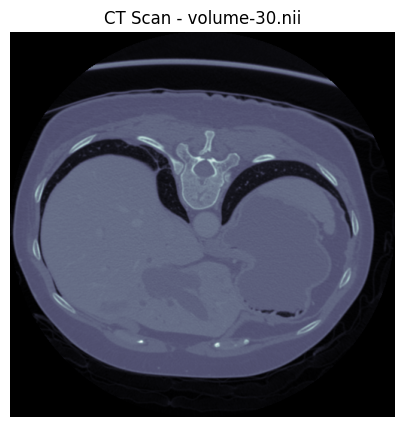

In [7]:
display_ct_scan(30, df)

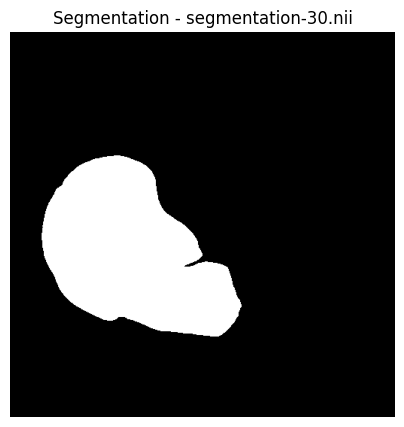

In [8]:
display_segmentation(30, df)